# Project Overview:
An image classification project that aims to classify fruits/vegetables.

## Goals:
Learn about CNNs, learn about tensorflow/PyTorch

Learn about computer vision and image classification

Importing Libraries

In [49]:
# pip install tensorflow==2.5.0 --ignore-installed

In [50]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2


import tensorflow as tf 
from tensorflow import keras 



In [52]:
DATADIR = "./fruit-recognition/train/train"
CATEGORIES = ["Apple Braeburn", "Apple Granny Smith", "Apricot", "Avocado", "Banana", "Blueberry", "Cactus fruit", "Cantaloupe", "Cherry", 
              "Clementine", "Corn", "Cucumber Ripe", "Grape Blue", "Kiwi", "Lemon", "Limes", "Mango", "Onion White", "Orange", "Papaya", 
              "Passion Fruit", "Peach", "Pear", "Pepper Green", "Pepper Red", "Pineapple", "Plum", "Pomegranate", 
              "Potato Red", "Raspberry", "Strawberry", "Tomato", "Watermelon"]

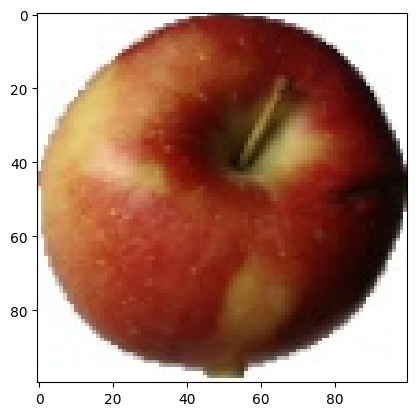

In [53]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to the fruit class dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR) # converts to grayscale FOR NOW, will try RBG later
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)
        plt.show()
        break;
    break
    
        
        

In [54]:
print(img_array)
print(img_array.shape)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
(100, 100, 3)


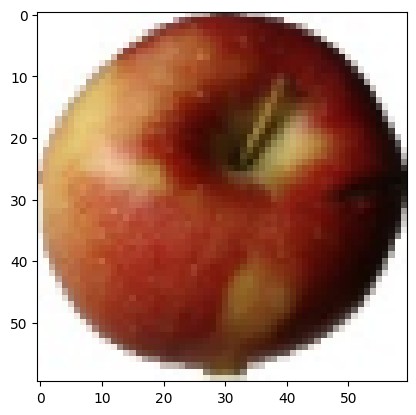

In [55]:
IMG_SIZE = 60
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [56]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to the fruit class dir
        class_num = CATEGORIES.index(category) # 0 is Apple Braeburn, 1 is Apple Granny Smith, ..., 32 is Watermelon
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR) # converts to grayscale FOR NOW, will try RBG later
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()
            

In [57]:
print(len(training_data))

16854


In [58]:
import random

random.shuffle(training_data)

In [59]:
for sample in training_data[:10]:
    print(sample[1])

28
24
5
25
16
5
16
30
0
3


In [60]:
X = []
y = []

In [61]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)# change the 1 to a 3 when I change from grayscale to RBG
y = np.array(y)



In [62]:
import pickle # for saving the data

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [63]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [64]:
X[1]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [65]:
train_path = "../input/fruit-recognition/train/train/"
test_path = "../input/fruit-recognition/test/test/"

In [66]:
train_val_data = {'path' : [],
       'filename': [],
       'label': []}
for dirpath, dirnames, filenames in os.walk(train_path):
    for f in filenames:
        train_val_data['path'].append(dirpath)
        train_val_data['filename'].append(f)
        train_val_data['label'].append(f.split('_')[0])

In [67]:
train_val_data_df = pd.DataFrame(train_val_data)
train_val_data_df.head()

,path,filename,label


In [68]:
test_data = {'path' : [],
       'filename': []}
for dirpath, dirnames, filenames in os.walk(test_path):
    for f in filenames:
        test_data['path'].append(dirpath)
        test_data['filename'].append(f)

In [69]:
test_data_df = pd.DataFrame(test_data)
test_data_df.head()

,path,filename


In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))
y_normalized = y

X = X/255.0

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", strides=1, padding='valid', input_shape= (60, 60, 3)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(300, activation = "relu"))

model.add(Dense(100, activation = "relu"))
model.add(Dense(33, activation = "softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer = "sgd", metrics=['accuracy'])

history = model.fit(X, y_normalized, batch_size = 64, epochs = 5, validation_split=0.3)



Epoch 1/5
185/185 [==============================] - 14s 73ms/step - loss: 2.1342 - accuracy: 0.4121 - val_loss: 1.1781 - val_accuracy: 0.5438
Epoch 2/5
185/185 [==============================] - 13s 72ms/step - loss: 0.5990 - accuracy: 0.8295 - val_loss: 1.5528 - val_accuracy: 0.6043
Epoch 3/5
185/185 [==============================] - 13s 72ms/step - loss: 0.2575 - accuracy: 0.9320 - val_loss: 0.3418 - val_accuracy: 0.8804
Epoch 4/5
185/185 [==============================] - 14s 73ms/step - loss: 0.1348 - accuracy: 0.9676 - val_loss: 0.2477 - val_accuracy: 0.9142
Epoch 5/5
185/185 [==============================] - 14s 74ms/step - loss: 0.1176 - accuracy: 0.9746 - val_loss: 0.0957 - val_accuracy: 0.9786


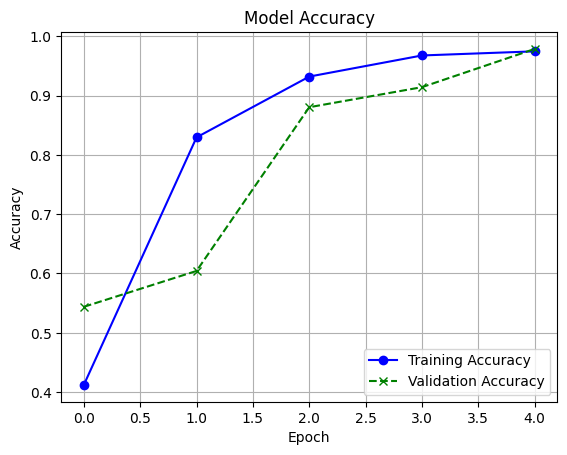

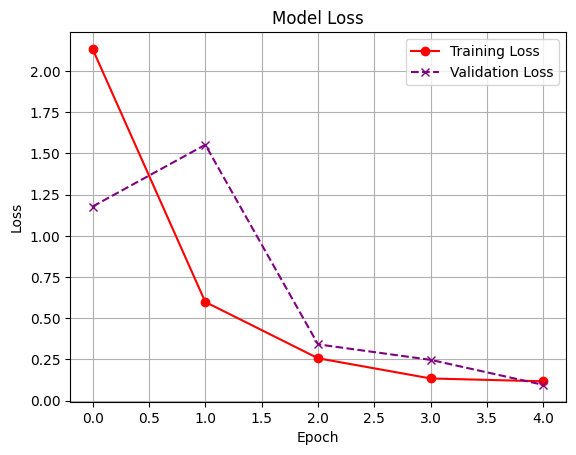

In [71]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', color='blue', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', color='green', marker='x')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss', linestyle='-', color='red', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', color='purple', marker='x')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

527/527 [==============================] - 5s 10ms/step


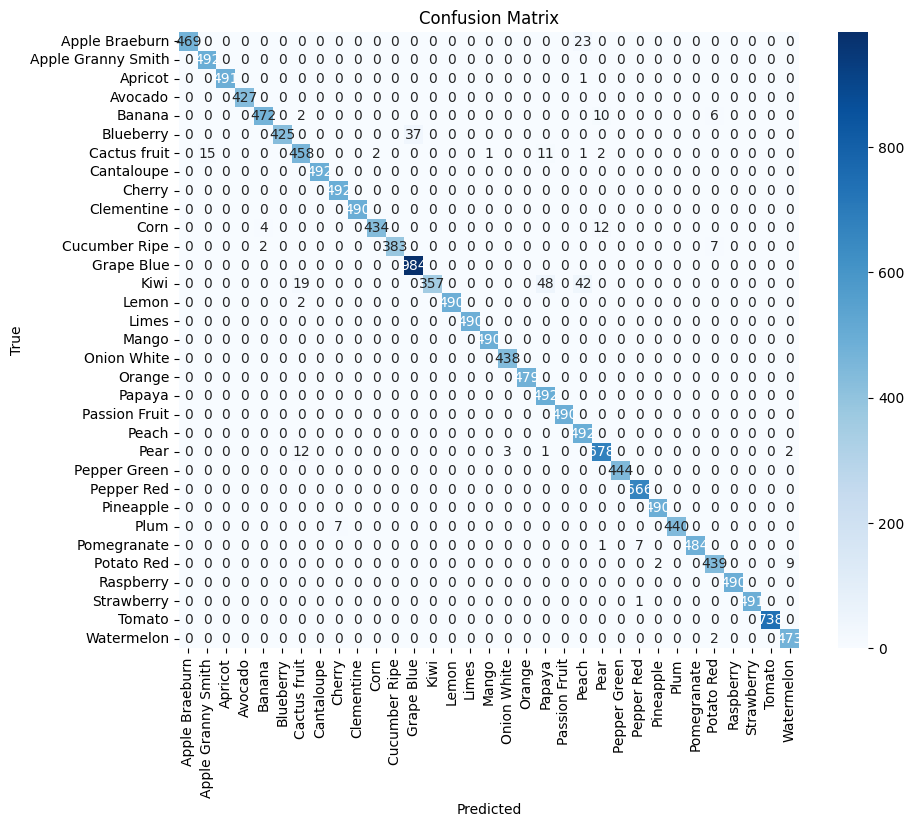

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming predictions are stored in 'y_pred'
y_pred = model.predict(X)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [73]:
from sklearn.metrics import classification_report

class_report = classification_report(y, y_pred_classes, target_names=CATEGORIES)
print(class_report)

                    precision    recall  f1-score   support

    Apple Braeburn       1.00      0.95      0.98       492
Apple Granny Smith       0.97      1.00      0.98       492
           Apricot       1.00      1.00      1.00       492
           Avocado       1.00      1.00      1.00       427
            Banana       0.99      0.96      0.98       490
         Blueberry       1.00      0.92      0.96       462
      Cactus fruit       0.93      0.93      0.93       490
        Cantaloupe       1.00      1.00      1.00       492
            Cherry       0.99      1.00      0.99       492
        Clementine       1.00      1.00      1.00       490
              Corn       1.00      0.96      0.98       450
     Cucumber Ripe       1.00      0.98      0.99       392
        Grape Blue       0.96      1.00      0.98       984
              Kiwi       1.00      0.77      0.87       466
             Lemon       1.00      1.00      1.00       492
             Limes       1.00      1.00

In [74]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [75]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import FileUpload


In [76]:

# Define the function to classify a custom image
def classify_custom_image(image_path):
    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (60, 60))  # Resize to the input size of the model
    image = image / 255.0  # Normalize the image
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Predict the class of the image
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=1)

    predicted_class_name = CATEGORIES[predicted_class[0]]

    # Display the result
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted: {predicted_class_name}')
    plt.axis('off')
    plt.show()

# Function to handle file upload and classification
def on_upload_change(change):
    uploaded_file = list(change['new'].values())[0]
    content = uploaded_file['content']
    file_path = 'uploaded_image.jpg'
    with open(file_path, 'wb') as f:
        f.write(content)
    classify_custom_image(file_path)



1/1 [==============================] - 0s 12ms/step


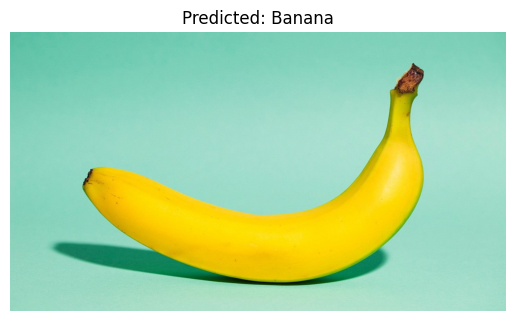

In [77]:
classify_custom_image('./fruit-recognition/banana.jpeg')

1/1 [==============================] - 0s 20ms/step


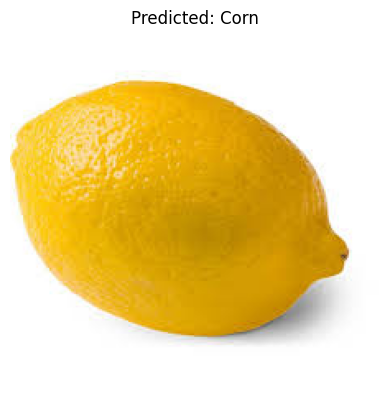

In [80]:
classify_custom_image('./fruit-recognition/lemon.jpeg')

1/1 [==============================] - 0s 11ms/step


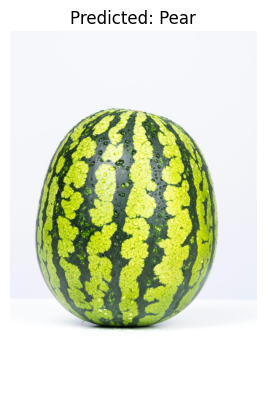

In [82]:
classify_custom_image('./fruit-recognition/watermelon.jpeg')

1/1 [==============================] - 0s 21ms/step


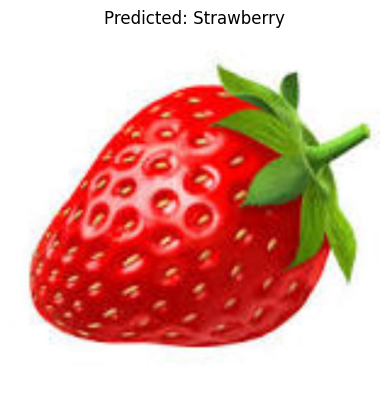

In [83]:
classify_custom_image('./fruit-recognition/strawberry.jpeg')